# IMPORT **LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**LOAD****  **DATASET**

In [58]:
df=pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [59]:
#upper some values
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [60]:
#information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [61]:
#shape
df.shape


(545, 13)

In [62]:
#tail()
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [63]:


#described
df.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


**MISSING** **VALUES**(NULL VALUES)

In [64]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [65]:
df.isnull().mean()*100

,0
price,0.0
area,0.0
bedrooms,0.0
bathrooms,0.0
stories,0.0
mainroad,0.0
guestroom,0.0
basement,0.0
hotwaterheating,0.0
airconditioning,0.0


In [66]:
## isnull with ratio

(df.isnull().sum())/891

,0
price,0.0
area,0.0
bedrooms,0.0
bathrooms,0.0
stories,0.0
mainroad,0.0
guestroom,0.0
basement,0.0
hotwaterheating,0.0
airconditioning,0.0


In [67]:
#  Drop rows with missing values (simple approach)
df_clean = df.dropna()
df_clean

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


**CREATING** **FEATURES**

In [68]:
from datetime import date
date.today().year
df['bedrooms']=date.today().year-df['parking']
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,2023,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,2022,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,2023,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,2022,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,2023,1,2,yes,yes,yes,no,yes,2,no,furnished


***DATA*** **CLEANING**

In [69]:
print(df.price.unique())

[13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  4956000  4935000  4907000  4900000  4893

In [70]:
print(df.stories.unique())

[3 4 2 1]


In [71]:
#described
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.024306e+03,8.615858e-01,2022.0,2024.0,2025.0,2025.0,2025.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [72]:
df.describe(include='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2024.306422,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.861586,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,2022.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2024.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,2025.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,2025.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


EDA(**Exploratory Data Analysis)**

Exploratory Data Analysis refers to  find meaningful patterns in data.give a clue to impute missing values in the dataset

In [73]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols=df.select_dtypes(include=np.number).columns.tolist()
print("categorial values")
print(cat_cols)
print("numerical values")
print(num_cols)

categorial values
Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')
numerical values
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


**UNIVARIATE ANALYSIS**

price
Skew : 1.21


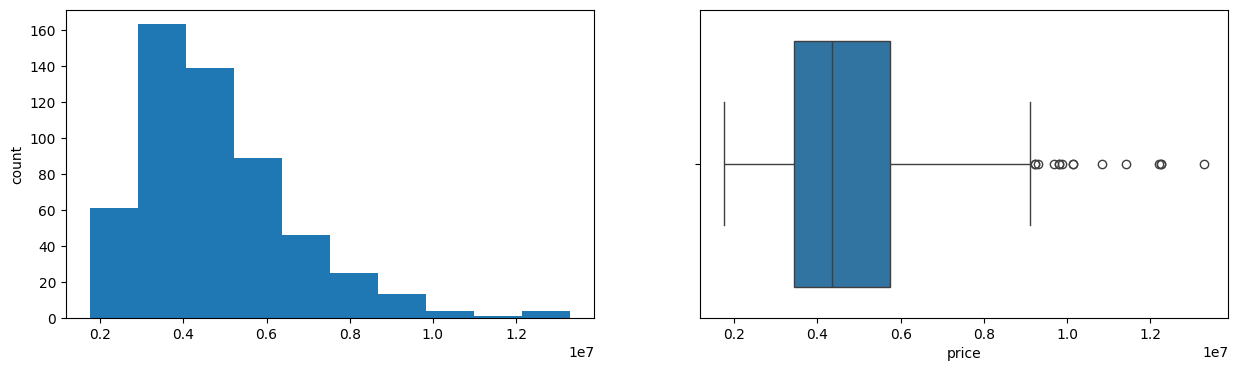

area
Skew : 1.32


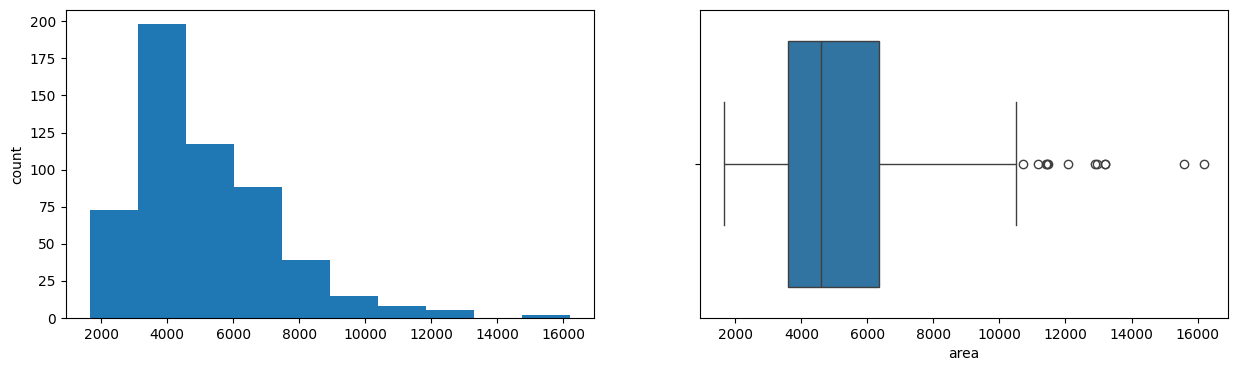

bedrooms
Skew : -0.84


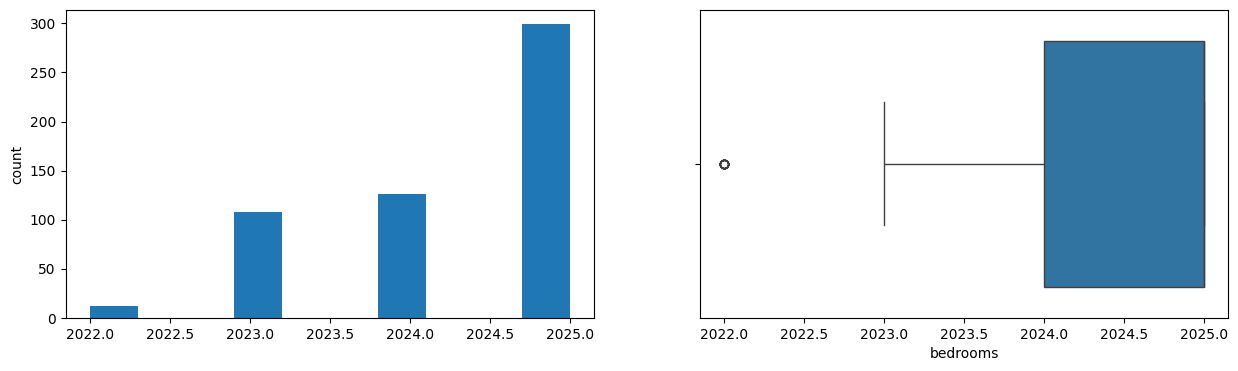

bathrooms
Skew : 1.59


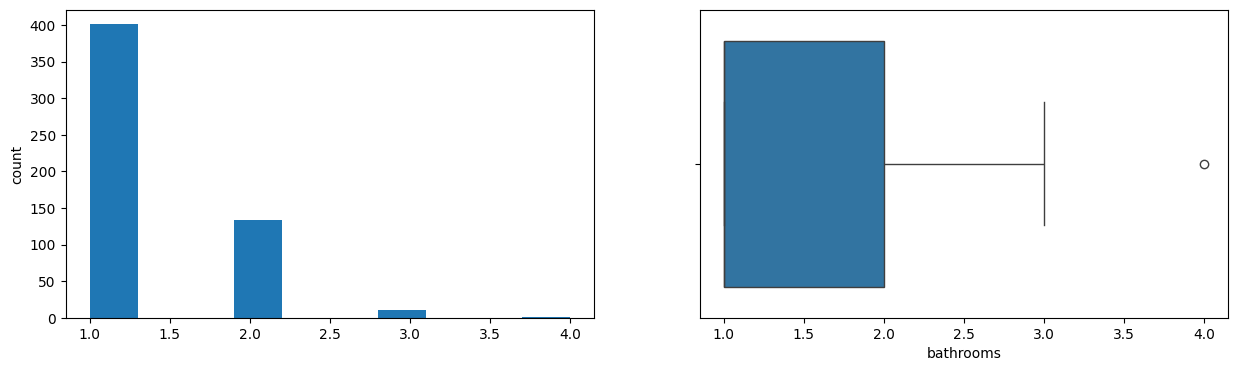

stories
Skew : 1.08


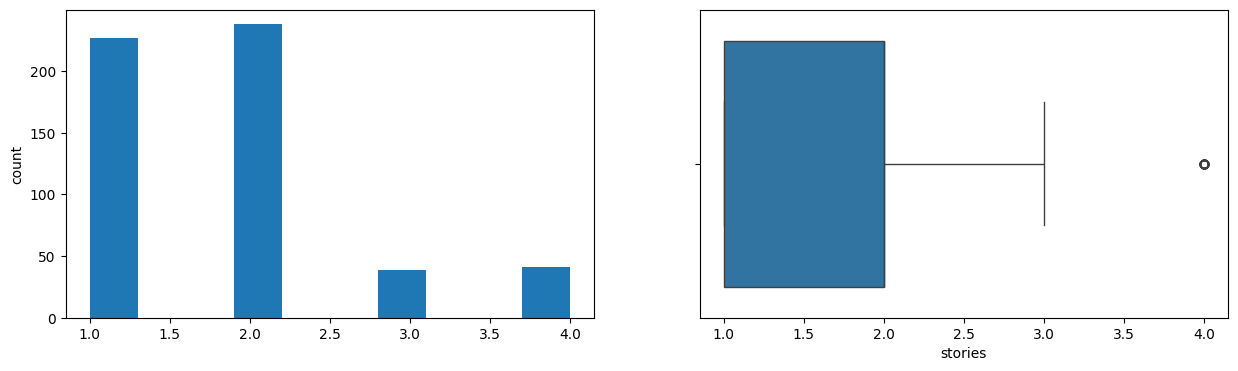

parking
Skew : 0.84


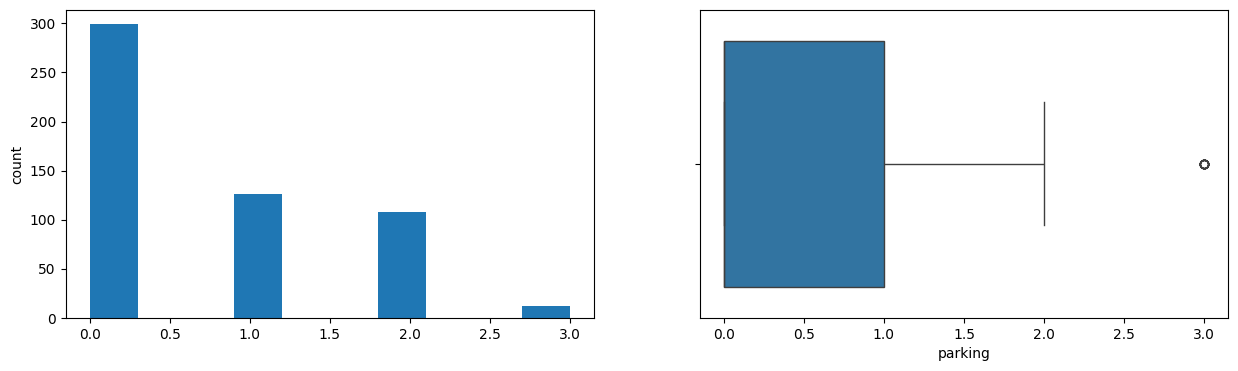

In [74]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

BIVARIATE ANALYSIS

<Figure size 1300x1700 with 0 Axes>

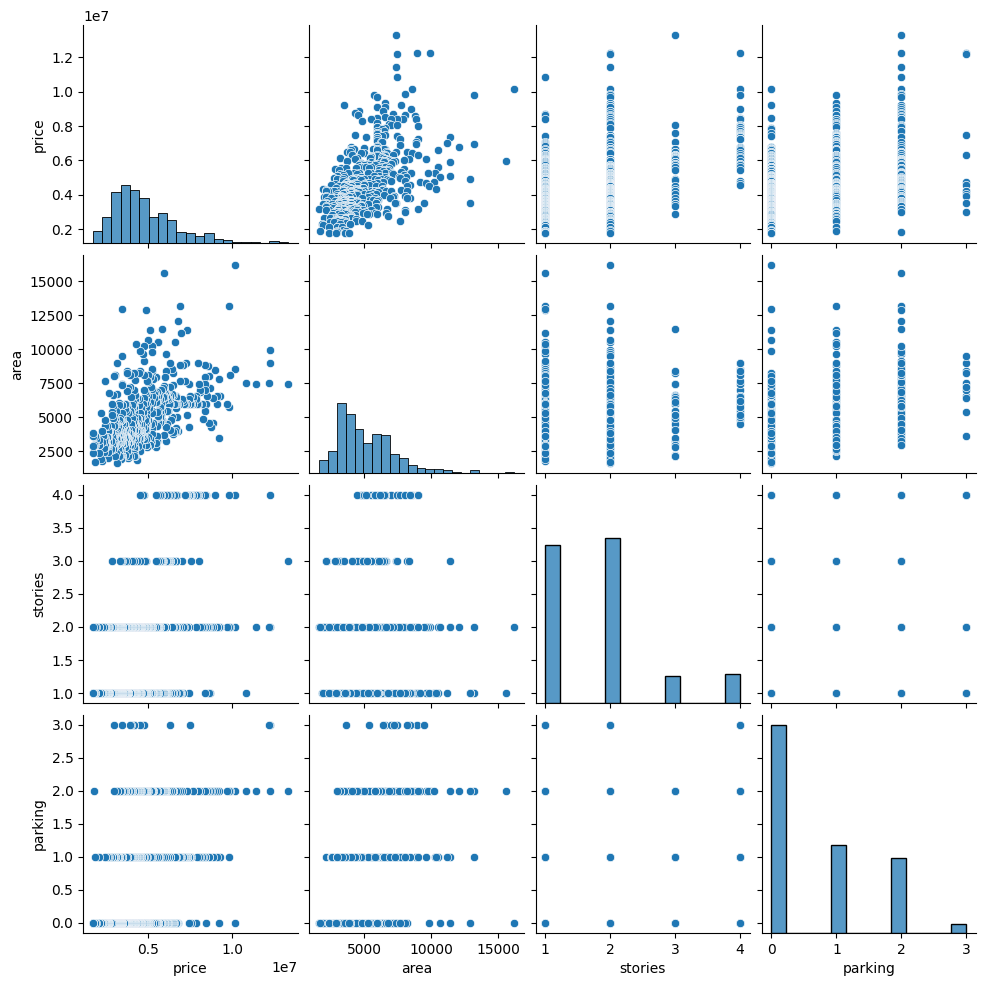

In [75]:
plt.figure(figsize=(13 , 17))
sns.pairplot(df.drop(['bedrooms','bathrooms'],axis=1))
plt.show()

**MULTIVARIATE** **ANALYSIS**

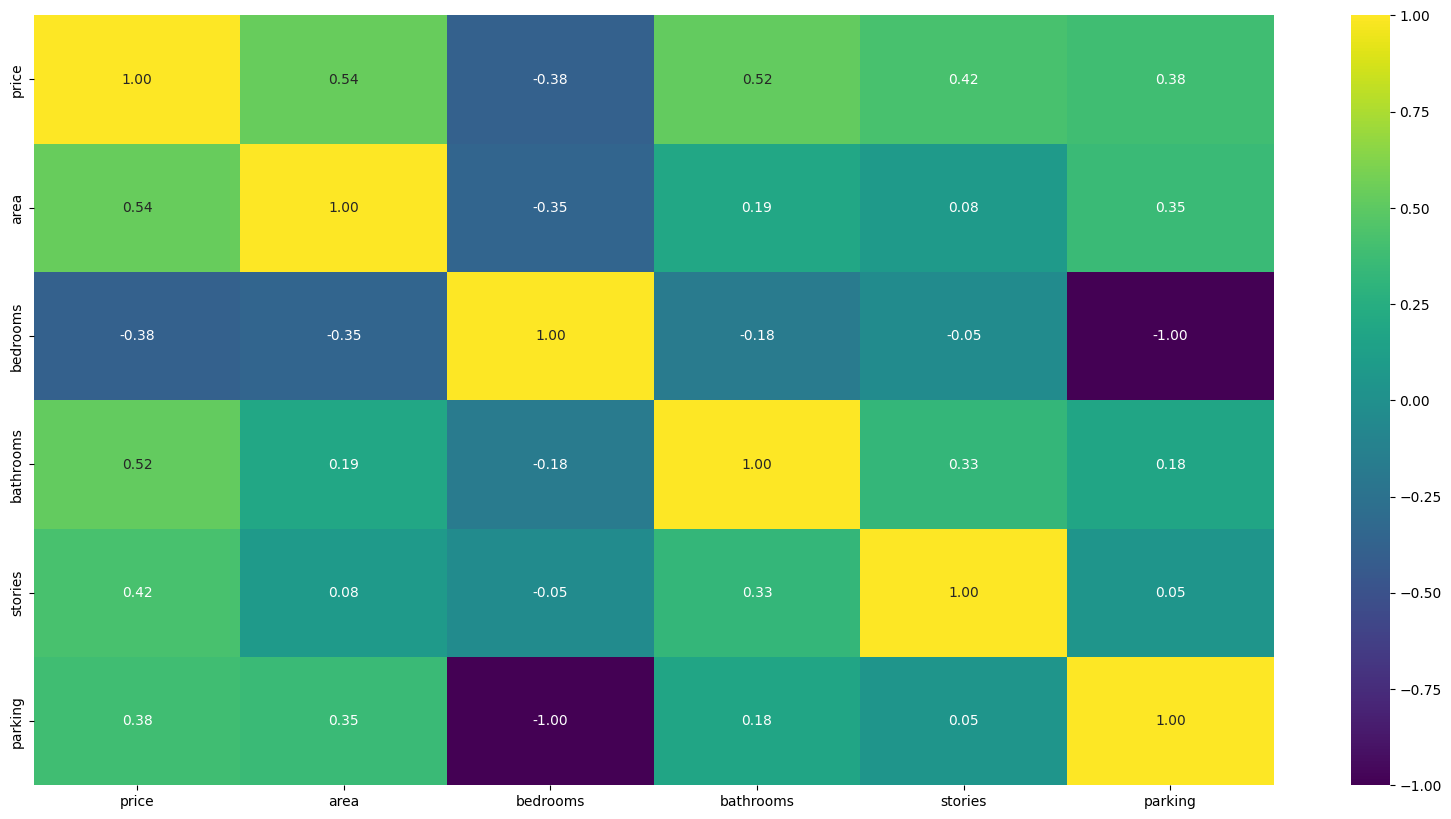

In [76]:
plt.figure(figsize=(20,10))
# Creating a heatmap using only numerical features for correlation analysis.
num_cols = df.select_dtypes(include=np.number).columns
sns.heatmap(df[num_cols].corr(), annot=True, cmap='viridis', fmt=".2f")
plt.show()

**SPLIT** **DATASET**

In [77]:
X=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [78]:
# Assuming 'price' is the target variable and all other numerical columns are features
X = df.drop('price', axis=1)  # Select all columns except 'price' for features
y = df['price']  # Select 'price' column as the target variable

# Now you can proceed with the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
lr= LinearRegression()

In [82]:
print(X_train.dtypes)
print(y_train.dtypes)
print(X_train.head())  # Inspect the first few rows
print(y_train.head())  # Inspect the first few rows

area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object
int64
     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
412  2610      2025          1        2      yes        no      yes   
284  7770      2024          1        1      yes        no       no   
504  3185      2025          1        1      yes        no       no   
209  6720      2025          1        1      yes        no       no   
269  3900      2025          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
412              no              no        0      yes      unfurnished  
284              no              no        1       no        furnished  
504       

In [83]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
412,2610,2025,1,2,yes,no,yes,no,no,0,yes,unfurnished
284,7770,2024,1,1,yes,no,no,no,no,1,no,furnished
504,3185,2025,1,1,yes,no,no,no,yes,0,no,unfurnished
209,6720,2025,1,1,yes,no,no,no,no,0,no,unfurnished
269,3900,2025,1,2,yes,no,no,no,no,0,no,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...
299,7000,2022,1,1,yes,no,no,no,no,3,no,furnished
534,3000,2025,1,2,yes,no,no,no,no,0,no,unfurnished
493,3960,2025,1,1,yes,no,no,no,no,0,no,furnished
527,1836,2025,1,1,no,no,yes,no,no,0,no,semi-furnished


In [84]:
y_train

,price
412,3430000
284,4270000
504,2653000
209,4900000
269,4375000
...,...
299,4200000
534,2100000
493,2800000
527,2275000


In [85]:
X = df.drop('price', axis=1)
y = df['price']

**ONE ENCODING**

In [86]:
data=pd.get_dummies(df['mainroad'])
data.head().astype(int)

,no,yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [87]:
cleaned_data = df.drop(['bathrooms','mainroad','bedrooms'], axis=1)
cleaned_data.head()


,price,area,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,3,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,no,no,no,yes,3,no,furnished
2,12250000,9960,2,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,2,no,yes,no,yes,3,yes,furnished
4,11410000,7420,2,yes,yes,no,yes,2,no,furnished


In [88]:
cleaned_data = pd.get_dummies(cleaned_data)
cleaned_data.head().astype(int)

,price,area,stories,parking,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,3,2,1,0,1,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,3,1,0,1,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,2,2,1,0,0,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,2,3,1,0,0,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,2,2,0,1,0,1,1,0,0,1,1,0,1,0,0


In [89]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [90]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample data
X = np.array([[1], [2], [3], [4], [5]])  # Independent variable
y = np.array([2, 4, 6, 8, 10])           # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict values
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Mean Squared Error: 0.0
Model Coefficients: [2.]
Model Intercept: 0.0


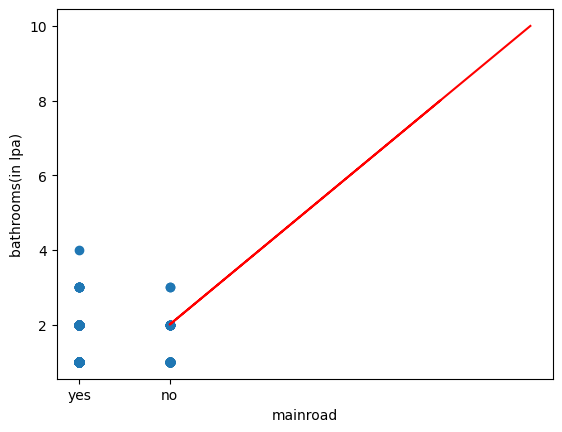

In [91]:
plt.scatter(df['mainroad'],df['bathrooms'])
lr.fit(X_train,y_train)
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('mainroad')
plt.ylabel('bathrooms(in lpa)')
plt.show()
